https://github.com/jupyter/notebook/issues/2287

incase you run into an issue with running the code due to exceeding run rate (?)

In [1]:
# imports for database connection
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine, func

# import these to view table column headers & rows
from sqlalchemy.orm import sessionmaker
from sqlalchemy import select

# Import the dependencies for analysis
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt

In [2]:
# UPDATE PATH ONCE FINAL ANALYSIS FILE IS COMPILED
engine = create_engine("sqlite:///../../Resources/covid_db.db")

In [3]:
# reflect an existing database into a new model (creates base class for automap schema)
Base = automap_base()

In [4]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
Base.classes.keys()

['covid_stats', 'government_regulation']

In [6]:
# save references to each table
covid_stats = Base.classes.covid_stats
government_regulation = Base.classes.government_regulation

In [7]:
# Create session (link) from Python to the database
session = sessionmaker(bind=engine)()

In [8]:
# Merge covid_stats_table with government regulation_table
joined = session.query(covid_stats.primary_key_reaction,\
                        covid_stats.date_updated,\
                        covid_stats.iso_code,\
                        covid_stats.continent,\
                        covid_stats.location,\
                        covid_stats.population,\
                        covid_stats.population_density,\
                        covid_stats.median_age,\
                        covid_stats.new_cases,\
                        covid_stats.percentage_of_Pop_New_Cases,\
                        covid_stats.new_deaths,\
                        covid_stats.percentage_of_Pop_New_Deaths,\
                        covid_stats.new_tests,\
                        covid_stats.percentage_of_Pop_New_Tests,\
                        covid_stats.total_cases_updated,\
                        covid_stats.percentage_of_Pop_Total_Cases,\
                        covid_stats.total_deaths_updated,\
                        covid_stats.percentage_of_Pop_Total_Deaths,\
                        covid_stats.total_tests_updated,\
                        covid_stats.percentage_of_Pop_Total_Tests,\
                       government_regulation.primary_key_response,\
                       government_regulation.StringencyIndex_updated,\
                       government_regulation.percentage_change_stringency,\
                       government_regulation.StringencyLegacyIndex_updated,\
                       government_regulation.GovernmentResponseIndex_updated,\
                       government_regulation.percentage_change_GovernmentResponse,\
                       government_regulation.ContainmentHealthIndex_updated,\
                       government_regulation.percentage_change_ContainmentHealth,\
                       government_regulation.EconomicSupportIndex_updated,\
                       government_regulation.percentage_change_EconomicSupport)\
        .join(government_regulation,government_regulation.primary_key_response == covid_stats.primary_key_reaction)

# save the query results as a Pandas DataFrame and set the index
merged_covid_df = pd.DataFrame(joined, columns=['primary_key_reaction',
                                             'date_updated',
                                             'iso_code',
                                             'continent',
                                             'location',
                                             'population',
                                             'population_density',
                                             'median_age',
                                             'new_cases',
                                             'percentage_of_Pop_New_Cases',
                                             'new_deaths',
                                             'percentage_of_Pop_New_Deaths',
                                             'new_tests',
                                             'percentage_of_Pop_New_Tests',
                                             'total_cases_updated',
                                             'percentage_of_Pop_Total_Cases',
                                             'total_deaths_updated',
                                             'percentage_of_Pop_Total_Deaths',
                                             'total_tests_updated',
                                             'percentage_of_Pop_Total_Tests',
                                             'primary_key_response',
                                             'StringencyIndex_updated',
                                             'percentage_change_stringency',
                                             'StringencyLegacyIndex_updated',
                                             'GovernmentResponseIndex_updated',
                                             'percentage_change_GovernmentResponse',
                                             'ContainmentHealthIndex_updated',
                                             'percentage_change_ContainmentHealth',
                                             'EconomicSupportIndex_updated',
                                             'percentage_change_EconomicSupport'
                                             ])

In [9]:
# preview 
merged_covid_df

,primary_key_reaction,date_updated,iso_code,continent,location,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,...,primary_key_response,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
0,ABW2020-03-13,2020-03-13,ABW,North America,Aruba,106766,584.800,41.2,2,0.001873,...,ABW2020-03-13,0.00,0.000000,0.00,2.56,0.000000,3.03,0.000000,0.0,0.0
1,ABW2020-03-19,2020-03-19,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,...,ABW2020-03-19,33.33,0.000000,42.86,29.49,15.015601,34.85,15.016502,0.0,0.0
2,ABW2020-03-20,2020-03-20,ABW,North America,Aruba,106766,584.800,41.2,2,0.001873,...,ABW2020-03-20,33.33,0.000000,42.86,29.49,0.000000,34.85,0.000000,0.0,0.0
3,ABW2020-03-21,2020-03-21,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,...,ABW2020-03-21,44.44,33.333333,60.71,37.18,26.076636,43.94,26.083214,0.0,0.0
4,ABW2020-03-22,2020-03-22,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,...,ABW2020-03-22,44.44,0.000000,60.71,37.18,0.000000,43.94,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32272,ZWE2020-08-27,2020-08-27,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,55,0.000370,...,ZWE2020-08-27,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32273,ZWE2020-08-28,2020-08-28,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,41,0.000276,...,ZWE2020-08-28,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32274,ZWE2020-08-29,2020-08-29,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,96,0.000646,...,ZWE2020-08-29,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32275,ZWE2020-08-30,2020-08-30,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,18,0.000121,...,ZWE2020-08-30,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0


### Trying to create a charts that shows shows historicals for index, cases, deaths, and tests

In [10]:
# Create new Dataframe filtered for Canada
canada_df = pd.DataFrame(merged_covid_df.loc[merged_covid_df["location"]=="Canada"].reset_index())
canada_df = canada_df.drop(["index"],axis=1)
# canada_df

In [11]:
# Create new Dataframe filtered for USA
usa_df = pd.DataFrame(merged_covid_df.loc[merged_covid_df["location"]=="United States"].reset_index())
usa_df = usa_df.drop(["index"],axis=1)
# usa_df

In [12]:
# Set up all x and y axis for Canada
x_axis = canada_df["date_updated"]

y_axis = canada_df["StringencyIndex_updated"]
y_axis1 = canada_df["total_cases_updated"]
y_axis2 = canada_df["total_tests_updated"]
y_axis3 = canada_df["total_deaths_updated"]
y_axis4 = canada_df["new_cases"]
y_axis5 = canada_df["new_tests"]
y_axis6 = canada_df["new_deaths"]

In [13]:
# Set up all x and y axis for USA
x_axis0 = usa_df["date_updated"]

y_axis0 = usa_df["StringencyIndex_updated"]
y_axis01 = usa_df["total_cases_updated"]
y_axis02 = usa_df["total_tests_updated"]
y_axis03 = usa_df["total_deaths_updated"]
y_axis04 = usa_df["new_cases"]
y_axis05 = usa_df["new_tests"]
y_axis06 = usa_df["new_deaths"]

Text(0.5, 1.0, 'Stringency Index by Day - CANADA')

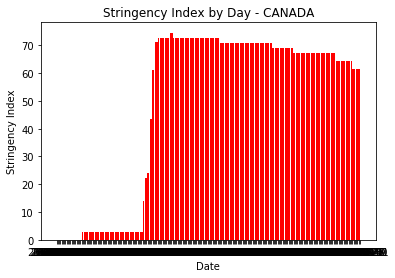

In [16]:
# Create the plot - canada
plt.bar(x_axis, y_axis, color="red", label="Stringency Index")

# Create labels for the x and y axis
plt.xlabel("Date")
plt.ylabel("Stringency Index")

# Create a title
plt.title("Stringency Index by Day - CANADA")

Text(0.5, 1.0, 'Stringency Index by Day - USA')

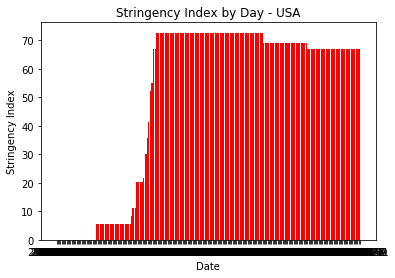

In [15]:
# Create the plot - usa
plt.bar(x_axis0, y_axis0, color="red", label="Stringency Index")

# Create labels for the x and y axis
plt.xlabel("Date")
plt.ylabel("Stringency Index")

# Create a title
plt.title("Stringency Index by Day - USA")

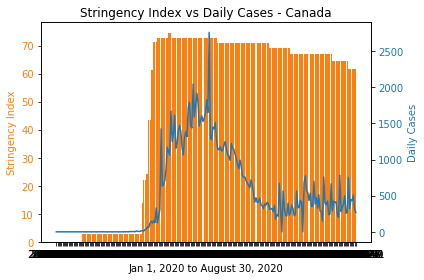

In [19]:
# Create comparison plot - index vs daily cases
fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('Jan 1, 2020 to August 30, 2020')
ax1.set_ylabel('Stringency Index', color=color)
ax1.bar(x_axis, y_axis, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Daily Cases', color=color)  # we already handled the x-label with ax1
ax2.plot(x_axis, y_axis4, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Stringency Index vs Daily Cases - Canada")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

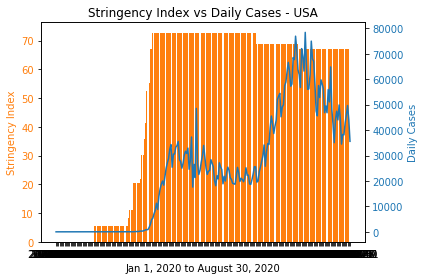

In [20]:
# Create comparison plot - index vs daily cases
fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('Jan 1, 2020 to August 30, 2020')
ax1.set_ylabel('Stringency Index', color=color)
ax1.bar(x_axis, y_axis0, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Daily Cases', color=color)  # we already handled the x-label with ax1
ax2.plot(x_axis, y_axis04, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Stringency Index vs Daily Cases - USA")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# interesting to note that when daily cases increase, stringency decreases

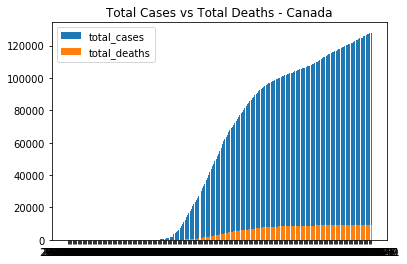

In [21]:
# Create the stacked bar chart - Canada
p1 = plt.bar(x_axis, y_axis1)
p2 = plt.bar(x_axis, y_axis3)

plt.title("Total Cases vs Total Deaths - Canada")

plt.legend(["total_cases", "total_deaths"])

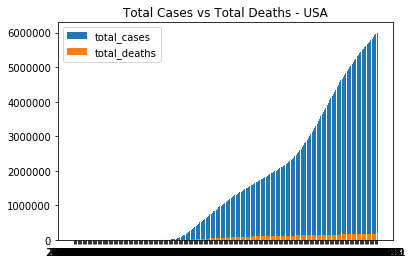

In [22]:
# Create the stacked bar chart - USA
p01 = plt.bar(x_axis, y_axis01)
p02 = plt.bar(x_axis, y_axis03)

plt.title("Total Cases vs Total Deaths - USA")

plt.legend(["total_cases", "total_deaths"])

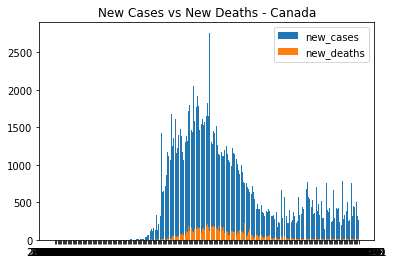

In [23]:
# Plot daily amounts for cases, deaths - Canada
p4 = plt.bar(x_axis, y_axis4)
p5 = plt.bar(x_axis, y_axis6)

plt.title("New Cases vs New Deaths - Canada")

plt.legend(["new_cases", "new_deaths"])

Text(0.5, 1.0, 'New Deaths - Canada')

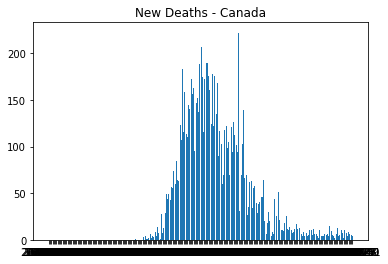

In [24]:
# Plot daily amounts for deaths - Canada
plt.bar(x_axis, y_axis6)

plt.title("New Deaths - Canada")

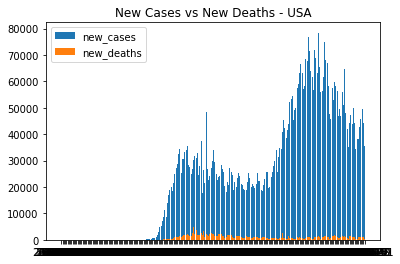

In [25]:
# Plot daily amounts for cases, deaths - Usa
p04 = plt.bar(x_axis, y_axis04)
p05 = plt.bar(x_axis, y_axis06)

plt.title("New Cases vs New Deaths - USA")

plt.legend(["new_cases", "new_deaths"])

Text(0.5, 1.0, 'New Deaths - USA')

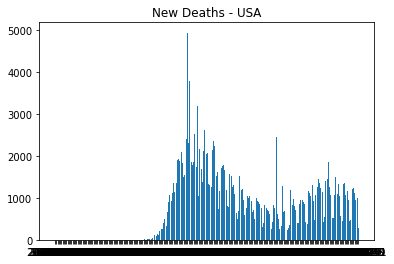

In [26]:
# Plot daily amounts for deaths - Usa
plt.bar(x_axis, y_axis06)

plt.title("New Deaths - USA")

### Trying to add a new column that calculates percentage change with strigency index

In [27]:
# Set the x-axis to a date_updated and y-axis to percentage change for Canada
x_axis = canada_df["date_updated"]
y_axis = canada_df["percentage_change_stringency"]

In [28]:
# Set the x-axis to a date_updated and y-axis to percentage change for USA
x_axis0 = usa_df["date_updated"]
y_axis0 = usa_df["percentage_change_stringency"]

Text(0.5, 1.0, 'Stringency Index Percentage Change - Canada')

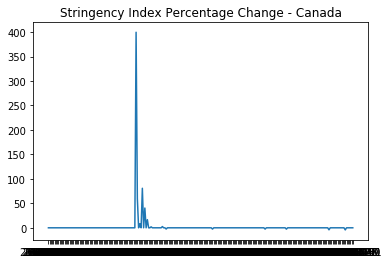

In [29]:
# Plot daily percentage change for stringency index - CANADA
plt.plot(x_axis , y_axis)

plt.title("Stringency Index Percentage Change - Canada")

Text(0.5, 1.0, 'Stringency Index Percentage Change - USA')

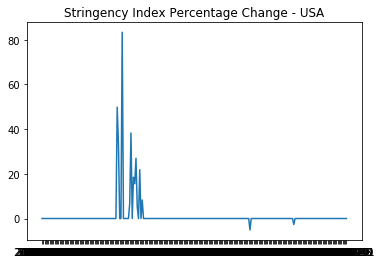

In [30]:
# Plot daily percentage change for stringency index - USA
plt.plot(x_axis0 , y_axis0)

plt.title("Stringency Index Percentage Change - USA")

### Will filter for the days that have material changes in policy

In [ ]:
# Filter based on percentage changes greater than 10% or any decrease in policy - USA
new_canada_GT10 = new_canada_df.loc[(new_canada_df.percentage_change_stringency > 10) | (new_canada_df.percentage_change_stringency < 0)]

In [ ]:
# Set the x-axis to a date_updated and y-axis to percentage change for Canada
x_axis = new_canada_GT10["date_updated"]
y_axis = new_canada_GT10["percentage_change_stringency"]

In [ ]:
# Plot material percentage change for stringency index - CANADA
plt.plot(x_axis , y_axis)

plt.xticks(rotation=60)

plt.title("Material (+10% or <0%) Stringency Index Percentage Change - Canada")

In [ ]:
# Filter based on percentage changes greater than 10% or any decrease in policy - USA
new_usa_GT10 = new_usa_df.loc[(new_usa_df.percentage_change_stringency > 10) | (new_usa_df.percentage_change_stringency < 0)]

In [ ]:
# Set the x-axis to a date_updated and y-axis to percentage change for USA
x_axis0 = new_usa_GT10["date_updated"]
y_axis0 = new_usa_GT10["percentage_change_stringency"]

In [ ]:
# Plot material percentage change for stringency index - USA
plt.plot(x_axis0 , y_axis0)

plt.xticks(rotation=60)

plt.title("Material (+10% or <0%) Stringency Index Percentage Change - USA")

### Trying to calculate percentages of population for existing metrics
notes:
- total tests doesn't mean one test per person only, so % of population isn't necessarily accurate
- total cases could include those who caught it a second time, though I'd imagine that is a very small number of people
- total deaths % of population isn't accurate either as the population amount doesn't change, implying daily birth and death isn't be captured in total population - assume the amounts generally net eachother out, or go off the general population trend of country

In [ ]:
# Set the x-axis to a date_updated and y-axis to % of Population - NEW - CANADA
x_axis1 = canada_df["date_updated"]
y_axis1 = canada_df["percentage_of_Pop_New_Tests"]

x_axis2 = canada_df["date_updated"]
y_axis2 = canada_df["percentage_of_Pop_New_Cases"]

x_axis3 = canada_df["date_updated"]
y_axis3 = canada_df["percentage_of_Pop_New_Deaths"]

In [ ]:
# Set the x-axis to a date_updated and y-axis to % of Population - TOTALS - CANADA
x_axis4 = canada_df["date_updated"]
y_axis4 = canada_df["percentage_of_Pop_Total_Tests"]

x_axis5 = canada_df["date_updated"]
y_axis5 = canada_df["percentage_of_Pop_Total_Cases"]

x_axis6 = canada_df["date_updated"]
y_axis6 = canada_df["percentage_of_Pop_Total_Deaths"]

In [ ]:
# Plot % of Population - NEW - CANADA
plt.plot(x_axis1, y_axis1)

plt.xticks(rotation=90)

plt.title("% of Population - NEW Tests - CANADA")

In [ ]:
# Plot % of Population - TOTAL - CANADA
plt.plot(x_axis4, y_axis4)

plt.xticks(rotation=90)

plt.title("% of Population - TOTAL Tested - CANADA")

In [ ]:
# Plot % of Population - NEW - CANADA
plt.plot(x_axis2, y_axis2, x_axis3, y_axis3)

plt.xticks(rotation=90)

plt.legend(["New Cases", "New Deaths"])

plt.title("% of Population - NEW Cases & Deaths - CANADA")

In [ ]:
# Plot % of Population - TOTAL - CANADA
plt.plot(x_axis5, y_axis5, x_axis6, y_axis6)

plt.xticks(rotation=90)

plt.legend(["Toal Cases", "Total Deaths"])

plt.title("% of Population - TOTAL Cases & Deaths - CANADA")

In [ ]:
# Set the x-axis to a date_updated and y-axis to % of Population - NEW - USA
x_axis01 = usa_df["date_updated"]
y_axis01 = usa_df["percentage_of_Pop_New_Tests"]

x_axis02 = usa_df["date_updated"]
y_axis02 = usa_df["percentage_of_Pop_New_Cases"]

x_axis03 = usa_df["date_updated"]
y_axis03 = usa_df["percentage_of_Pop_New_Deaths"]

In [ ]:
# Set the x-axis to a date_updated and y-axis to % of Population - TOTAL - USA
x_axis04 = usa_df["date_updated"]
y_axis04 = usa_df["percentage_of_Pop_Total_Tests"]

x_axis05 = usa_df["date_updated"]
y_axis05 = usa_df["percentage_of_Pop_Total_Cases"]

x_axis06 = usa_df["date_updated"]
y_axis06 = usa_df["percentage_of_Pop_Total_Deaths"]

In [ ]:
# Plot % of Population - NEW - USA
plt.plot(x_axis01, y_axis01)

plt.xticks(rotation=90)


plt.title("% of Population - NEW Tests - USA")

In [ ]:
# Plot % of Population - TOTAL - USA
plt.plot(x_axis04, y_axis04)

plt.xticks(rotation=90)


plt.title("% of Population - TOTAL Tests - USA")

In [ ]:
# Plot % of Population - NEW - USA
plt.plot(x_axis02, y_axis02, x_axis03, y_axis03)

plt.xticks(rotation=90)

plt.legend(["New Cases", "New Deaths"])

plt.title("% of Population - NEW Cases & Deaths - USA")

In [ ]:
# Plot % of Population - TOTAL - USA
plt.plot(x_axis05, y_axis05, x_axis06, y_axis06)

plt.xticks(rotation=90)

plt.legend(["Total Cases", "Total Deaths"])

plt.title("% of Population - TOTAL Cases & Deaths- USA")

In [ ]:
# Plot % of Population - TOTAL - USA
plt.plot(x_axis06, y_axis06)

plt.xticks(rotation=90)

plt.legend(["Total Cases", "Total Deaths"])

plt.title("% of Population - TOTAL Deaths- USA")

### Trying to capture total stats based on material changes in stringency index

In [ ]:
# To track # days out - CANADA
canada_df["date_updated"] = pd.to_datetime(canada_df['date_updated'])
canada_df['+7 days'] = canada_df['date_updated']+timedelta(days=7)
canada_df['+14 days'] = canada_df['date_updated']+timedelta(days=14)
canada_df['+30 days'] = canada_df['date_updated']+timedelta(days=30)
canada_df['+60 days'] = canada_df['date_updated']+timedelta(days=60)

In [ ]:
# Create date shifted DataFrames - CANADA
sub_total_updated = canada_df[["date_updated","location","total_tests_updated","total_cases_updated","total_deaths_updated"]]


sub_total_updated_7 = sub_total_updated.loc[sub_total_updated.date_updated >= "2020-01-07" ].reset_index()
sub_total_updated_7 = sub_total_updated_7.drop(["index"], axis=1)

sub_total_updated_14 = sub_total_updated.loc[sub_total_updated.date_updated >= "2020-01-14" ].reset_index()
sub_total_updated_14 = sub_total_updated_14.drop(["index"], axis=1)

sub_total_updated_30 = sub_total_updated.loc[sub_total_updated.date_updated >= "2020-01-30" ].reset_index()
sub_total_updated_30 = sub_total_updated_30.drop(["index"], axis=1)

sub_total_updated_60 = sub_total_updated.loc[sub_total_updated.date_updated >= "2020-02-29" ].reset_index()
sub_total_updated_60 = sub_total_updated_60.drop(["index"], axis=1)

In [ ]:
# Add new columns for shifted results - CANADA
# 7 Days out...
canada_df["7 Days - Total Tests"] = sub_total_updated_7["total_tests_updated"]
canada_df["7 Days - Total Cases"] = sub_total_updated_7["total_cases_updated"]
canada_df["7 Days - Total Deaths"] = sub_total_updated_7["total_deaths_updated"]

# 14 Days out...
canada_df["14 Days - Total Tests"] = sub_total_updated_14["total_tests_updated"]
canada_df["14 Days - Total Cases"] = sub_total_updated_14["total_cases_updated"]
canada_df["14 Days - Total Deaths"] = sub_total_updated_14["total_deaths_updated"]

# 30 Days out...
canada_df["30 Days - Total Tests"] = sub_total_updated_30["total_tests_updated"]
canada_df["30 Days - Total Cases"] = sub_total_updated_30["total_cases_updated"]
canada_df["30 Days - Total Deaths"] = sub_total_updated_30["total_deaths_updated"]

# 60 Days out...
canada_df["60 Days - Total Tests"] = sub_total_updated_60["total_tests_updated"]
canada_df["60 Days - Total Cases"] = sub_total_updated_60["total_cases_updated"]
canada_df["60 Days - Total Deaths"] = sub_total_updated_60["total_deaths_updated"]

In [ ]:
# In all shifter results columns, replace NaN with proceeding value - CANADA
canada_df_filled = canada_df.fillna(method="ffill")

In [ ]:
# Add new columns for % change from shifter results - CANADA
# 7 Days out...
canada_df_filled["7 Days - % Change Tests"] = ((canada_df_filled["7 Days - Total Tests"]-canada_df_filled["total_tests_updated"])/canada_df_filled["total_tests_updated"])*100
canada_df_filled["7 Days - % Change Cases"] = ((canada_df_filled["7 Days - Total Cases"]-canada_df_filled["total_cases_updated"])/canada_df_filled["total_tests_updated"])*100
canada_df_filled["7 Days - % Change Deaths"] = ((canada_df_filled["7 Days - Total Deaths"]-canada_df_filled["total_deaths_updated"])/canada_df_filled["total_tests_updated"])*100

# 14 Days out...
canada_df_filled["14 Days - % Change Tests"] = ((canada_df_filled["14 Days - Total Tests"]-canada_df_filled["total_tests_updated"])/canada_df_filled["total_tests_updated"])*100
canada_df_filled["14 Days - % Change Cases"] = ((canada_df_filled["14 Days - Total Cases"]-canada_df_filled["total_cases_updated"])/canada_df_filled["total_tests_updated"])*100
canada_df_filled["14 Days - % Change Deaths"] = ((canada_df_filled["14 Days - Total Deaths"]-canada_df_filled["total_deaths_updated"])/canada_df_filled["total_tests_updated"])*100

# 30 Days out...
canada_df_filled["30 Days - % Change Tests"] = ((canada_df_filled["30 Days - Total Tests"]-canada_df_filled["total_tests_updated"])/canada_df_filled["total_tests_updated"])*100
canada_df_filled["30 Days - % Change Cases"] = ((canada_df_filled["30 Days - Total Cases"]-canada_df_filled["total_cases_updated"])/canada_df_filled["total_tests_updated"])*100
canada_df_filled["30 Days - % Change Deaths"] = ((canada_df_filled["30 Days - Total Deaths"]-canada_df_filled["total_deaths_updated"])/canada_df_filled["total_tests_updated"])*100

# 60 Days out...
canada_df_filled["60 Days - % Change Tests"] = ((canada_df_filled["60 Days - Total Tests"]-canada_df_filled["total_tests_updated"])/canada_df_filled["total_tests_updated"])*100
canada_df_filled["60 Days - % Change Cases"] = ((canada_df_filled["60 Days - Total Cases"]-canada_df_filled["total_cases_updated"])/canada_df_filled["total_tests_updated"])*100
canada_df_filled["60 Days - % Change Deaths"] = ((canada_df_filled["60 Days - Total Deaths"]-canada_df_filled["total_deaths_updated"])/canada_df_filled["total_tests_updated"])*100

In [ ]:
# Filter for material percentage changes (>10% or <0%) - CANADA
new_canada_projection = canada_df_filled.loc[(new_canada_df.percentage_change_stringency > 10) | 
                                    (new_canada_df.percentage_change_stringency < 0)]

In [ ]:
# Rearrange columns in logical order - CANADA
new_canada_projection = new_canada_projection[['date_updated', 
                                         'location', 
                                         'population',
                                         'StringencyIndex_updated',
                                         'new_tests', 
                                         'percentage of Pop - New Tests',
                                         'total_tests_updated', 
                                         'percentage of Pop - Total Tests',
                                         '7 Days - Total Tests',
                                         '7 Days - % Change Tests',
                                         '14 Days - Total Tests', 
                                         '14 Days - % Change Tests',
                                         '30 Days - Total Tests',
                                         '30 Days - % Change Tests',
                                         '60 Days - Total Tests', 
                                         '60 Days - % Change Tests',
                                         'new_cases', 
                                         'percentage of Pop - New Cases',
                                         'total_cases_updated', 
                                         'percentage of Pop - Total Cases',
                                         '7 Days - Total Cases',
                                         '7 Days - % Change Cases',
                                         '14 Days - Total Cases',
                                         '14 Days - % Change Cases',
                                         '30 Days - Total Cases',
                                         '30 Days - % Change Cases',
                                         '60 Days - Total Cases',
                                         '60 Days - % Change Cases',
                                         'new_deaths',
                                         'percentage of Pop - New Deaths',
                                         'total_deaths_updated',
                                         'percentage of Pop - Total Deaths',
                                         '7 Days - Total Deaths',
                                         '7 Days - % Change Deaths',
                                         '14 Days - Total Deaths', 
                                         '14 Days - % Change Deaths',
                                         '30 Days - Total Deaths',
                                         '30 Days - % Change Deaths',
                                         '60 Days - Total Deaths', 
                                         '60 Days - % Change Deaths'
                                        ]]

# Replace NaN with 0 
new_canada_projection.fillna(0, inplace=True)

# Replace inf with 0 
new_canada_projection.replace(np.inf, 0, inplace=True)

new_canada_projection

In [ ]:
# To track # days out - USA
usa_df["date_updated"] = pd.to_datetime(usa_df['date_updated'])
usa_df['+7 days'] = usa_df['date_updated']+timedelta(days=7)
usa_df['+14 days'] = usa_df['date_updated']+timedelta(days=14)
usa_df['+30 days'] = usa_df['date_updated']+timedelta(days=30)
usa_df['+60 days'] = usa_df['date_updated']+timedelta(days=60)

In [ ]:
# Create date shifted DataFrames - USA
sub_total_updated = usa_df[["date_updated","location","total_tests_updated","total_cases_updated","total_deaths_updated"]]


sub_total_updated_7 = sub_total_updated.loc[sub_total_updated.date_updated >= "2020-01-07" ].reset_index()
sub_total_updated_7 = sub_total_updated_7.drop(["index"], axis=1)

sub_total_updated_14 = sub_total_updated.loc[sub_total_updated.date_updated >= "2020-01-14" ].reset_index()
sub_total_updated_14 = sub_total_updated_14.drop(["index"], axis=1)

sub_total_updated_30 = sub_total_updated.loc[sub_total_updated.date_updated >= "2020-01-30" ].reset_index()
sub_total_updated_30 = sub_total_updated_30.drop(["index"], axis=1)

sub_total_updated_60 = sub_total_updated.loc[sub_total_updated.date_updated >= "2020-02-29" ].reset_index()
sub_total_updated_60 = sub_total_updated_60.drop(["index"], axis=1)

In [ ]:
# Add new columns for shifted results - USA
# 7 Days out...
usa_df["7 Days - Total Tests"] = sub_total_updated_7["total_tests_updated"]
usa_df["7 Days - Total Cases"] = sub_total_updated_7["total_cases_updated"]
usa_df["7 Days - Total Deaths"] = sub_total_updated_7["total_deaths_updated"]

# 14 Days out...
usa_df["14 Days - Total Tests"] = sub_total_updated_14["total_tests_updated"]
usa_df["14 Days - Total Cases"] = sub_total_updated_14["total_cases_updated"]
usa_df["14 Days - Total Deaths"] = sub_total_updated_14["total_deaths_updated"]

# 30 Days out...
usa_df["30 Days - Total Tests"] = sub_total_updated_30["total_tests_updated"]
usa_df["30 Days - Total Cases"] = sub_total_updated_30["total_cases_updated"]
usa_df["30 Days - Total Deaths"] = sub_total_updated_30["total_deaths_updated"]

# 60 Days out...
usa_df["60 Days - Total Tests"] = sub_total_updated_60["total_tests_updated"]
usa_df["60 Days - Total Cases"] = sub_total_updated_60["total_cases_updated"]
usa_df["60 Days - Total Deaths"] = sub_total_updated_60["total_deaths_updated"]

In [ ]:
# In all shifter results columns, replace NaN with proceeding value - USA
usa_df_filled = usa_df.fillna(method="ffill")

In [ ]:
# Add new columns for % change from shifter results - USA
# 7 Days out...
usa_df_filled["7 Days - % Change Tests"] = ((usa_df_filled["7 Days - Total Tests"]-usa_df_filled["total_tests_updated"])/usa_df_filled["total_tests_updated"])*100
usa_df_filled["7 Days - % Change Cases"] = ((usa_df_filled["7 Days - Total Cases"]-usa_df_filled["total_cases_updated"])/usa_df_filled["total_tests_updated"])*100
usa_df_filled["7 Days - % Change Deaths"] = ((usa_df_filled["7 Days - Total Deaths"]-usa_df_filled["total_deaths_updated"])/usa_df_filled["total_tests_updated"])*100

# 14 Days out...
usa_df_filled["14 Days - % Change Tests"] = ((usa_df_filled["14 Days - Total Tests"]-usa_df_filled["total_tests_updated"])/usa_df_filled["total_tests_updated"])*100
usa_df_filled["14 Days - % Change Cases"] = ((usa_df_filled["14 Days - Total Cases"]-usa_df_filled["total_cases_updated"])/usa_df_filled["total_tests_updated"])*100
usa_df_filled["14 Days - % Change Deaths"] = ((usa_df_filled["14 Days - Total Deaths"]-usa_df_filled["total_deaths_updated"])/usa_df_filled["total_tests_updated"])*100

# 30 Days out...
usa_df_filled["30 Days - % Change Tests"] = ((usa_df_filled["30 Days - Total Tests"]-usa_df_filled["total_tests_updated"])/usa_df_filled["total_tests_updated"])*100
usa_df_filled["30 Days - % Change Cases"] = ((usa_df_filled["30 Days - Total Cases"]-usa_df_filled["total_cases_updated"])/usa_df_filled["total_tests_updated"])*100
usa_df_filled["30 Days - % Change Deaths"] = ((usa_df_filled["30 Days - Total Deaths"]-usa_df_filled["total_deaths_updated"])/usa_df_filled["total_tests_updated"])*100

# 60 Days out...
usa_df_filled["60 Days - % Change Tests"] = ((usa_df_filled["60 Days - Total Tests"]-usa_df_filled["total_tests_updated"])/usa_df_filled["total_tests_updated"])*100
usa_df_filled["60 Days - % Change Cases"] = ((usa_df_filled["60 Days - Total Cases"]-usa_df_filled["total_cases_updated"])/usa_df_filled["total_tests_updated"])*100
usa_df_filled["60 Days - % Change Deaths"] = ((usa_df_filled["60 Days - Total Deaths"]-usa_df_filled["total_deaths_updated"])/usa_df_filled["total_tests_updated"])*100

In [ ]:
# Filter for material percentage changes (>10% or <0%) - USA
new_usa_projection = usa_df_filled.loc[(new_usa_df.percentage_change_stringency > 10) | 
                                    (new_usa_df.percentage_change_stringency < 0)]

In [ ]:
# Rearrange columns in logical order - USA
new_usa_projection = new_usa_projection[['date_updated', 
                                         'location', 
                                         'population',
                                         'StringencyIndex_updated',
                                         'new_tests', 
                                         'percentage of Pop - New Tests',
                                         'total_tests_updated', 
                                         'percentage of Pop - Total Tests',
                                         '7 Days - Total Tests',
                                         '7 Days - % Change Tests',
                                         '14 Days - Total Tests', 
                                         '14 Days - % Change Tests',
                                         '30 Days - Total Tests',
                                         '30 Days - % Change Tests',
                                         '60 Days - Total Tests', 
                                         '60 Days - % Change Tests',
                                         'new_cases', 
                                         'percentage of Pop - New Cases',
                                         'total_cases_updated', 
                                         'percentage of Pop - Total Cases',
                                         '7 Days - Total Cases',
                                         '7 Days - % Change Cases',
                                         '14 Days - Total Cases',
                                         '14 Days - % Change Cases',
                                         '30 Days - Total Cases',
                                         '30 Days - % Change Cases',
                                         '60 Days - Total Cases',
                                         '60 Days - % Change Cases',
                                         'new_deaths',
                                         'percentage of Pop - New Deaths',
                                         'total_deaths_updated',
                                         'percentage of Pop - Total Deaths',
                                         '7 Days - Total Deaths',
                                         '7 Days - % Change Deaths',
                                         '14 Days - Total Deaths', 
                                         '14 Days - % Change Deaths',
                                         '30 Days - Total Deaths',
                                         '30 Days - % Change Deaths',
                                         '60 Days - Total Deaths', 
                                         '60 Days - % Change Deaths'
                                        ]]

# Replace NaN with 0 
new_usa_projection.fillna(0, inplace=True)

# Replace inf with 0 
new_usa_projection.replace(np.inf, 0, inplace=True)

new_usa_projection

### creating some graphs for analysis of material changes in index

In [ ]:
new_canada_projection = new_canada_projection[[ 
                                         'date_updated',
                                         'total_cases_updated', 
                                         '7 Days - Total Cases',
                                         '14 Days - Total Cases',
                                         '30 Days - Total Cases',
                                         '60 Days - Total Cases'
                                         ]]
new_canada_projection = new_canada_projection.transpose().reset_index()

#grab the first row for the header
new_header = new_canada_projection.iloc[0]

#take the data less the header row
new_canada_projection = new_canada_projection[1:]

#set the header row as the df header
new_canada_projection.columns = new_header

new_canada_projection

In [ ]:
# Set the axis - CANADA
x_axis1 = new_canada_projection["date_updated"]
y_axis1 = new_canada_projection.iloc[ : ,1]

x_axis2 = new_canada_projection["date_updated"]
y_axis2 = new_canada_projection.iloc[ : ,2]

x_axis3 = new_canada_projection["date_updated"]
y_axis3 = new_canada_projection.iloc[ : ,3]

x_axis4 = new_canada_projection["date_updated"]
y_axis4 = new_canada_projection.iloc[ : ,4]

x_axis5 = new_canada_projection["date_updated"]
y_axis5 = new_canada_projection.iloc[ : ,5]

x_axis6 = new_canada_projection["date_updated"]
y_axis6 = new_canada_projection.iloc[ : ,6]

x_axis7 = new_canada_projection["date_updated"]
y_axis7 = new_canada_projection.iloc[ : ,7]

x_axis8 = new_canada_projection["date_updated"]
y_axis8 = new_canada_projection.iloc[ : ,8]

x_axis9 = new_canada_projection["date_updated"]
y_axis9 = new_canada_projection.iloc[ : ,9]

x_axis10 = new_canada_projection["date_updated"]
y_axis10 = new_canada_projection.iloc[ : ,10]

# x_axis11 = new_canada_projection["date_updated"]
# y_axis11 = new_canada_projection.iloc[ : ,11]

# x_axis12 = new_canada_projection["date_updated"]
# y_axis12 = new_canada_projection.iloc[ : ,12]


In [ ]:
# Plot amounts for cases, at intervals - CANADA
p1 = plt.plot(x_axis1 , y_axis1)
p2 = plt.plot(x_axis2 , y_axis2)
p3 = plt.plot(x_axis3 , y_axis3)
p4 = plt.plot(x_axis4 , y_axis4)
p5 = plt.plot(x_axis5 , y_axis5)
p1 = plt.plot(x_axis6 , y_axis6)
p1 = plt.plot(x_axis7 , y_axis7)
p1 = plt.plot(x_axis8 , y_axis8)
p1 = plt.plot(x_axis9 , y_axis9)
p1 = plt.plot(x_axis10 , y_axis10)
# p1 = plt.plot(x_axis11 , y_axis11)
# p1 = plt.plot(x_axis12 , y_axis12)
plt.title("Milestone Moments - Impact on Cases - CANADA")

plt.xticks(rotation=90)

In [ ]:
new_usa_projection = new_usa_projection[[ 
                                         'date_updated',
                                         'total_cases_updated', 
                                         '7 Days - Total Cases',
                                         '14 Days - Total Cases',
                                         '30 Days - Total Cases',
                                         '60 Days - Total Cases'
                                         ]]
new_usa_projection = new_usa_projection.transpose().reset_index()

#grab the first row for the header
new_header = new_usa_projection.iloc[0]

#take the data less the header row
new_usa_projection = new_usa_projection[1:]

#set the header row as the df header
new_usa_projection.columns = new_header

new_usa_projection

In [ ]:
# Set the axis - USA
x_axis1 = new_usa_projection["date_updated"]
y_axis1 = new_usa_projection.iloc[ : ,1]

x_axis2 = new_usa_projection["date_updated"]
y_axis2 = new_usa_projection.iloc[ : ,2]

x_axis3 = new_usa_projection["date_updated"]
y_axis3 = new_usa_projection.iloc[ : ,3]

x_axis4 = new_usa_projection["date_updated"]
y_axis4 = new_usa_projection.iloc[ : ,4]

x_axis5 = new_usa_projection["date_updated"]
y_axis5 = new_usa_projection.iloc[ : ,5]

x_axis6 = new_usa_projection["date_updated"]
y_axis6 = new_usa_projection.iloc[ : ,6]

x_axis7 = new_usa_projection["date_updated"]
y_axis7 = new_usa_projection.iloc[ : ,7]

x_axis8 = new_usa_projection["date_updated"]
y_axis8 = new_usa_projection.iloc[ : ,8]

x_axis9 = new_usa_projection["date_updated"]
y_axis9 = new_usa_projection.iloc[ : ,9]

x_axis10 = new_usa_projection["date_updated"]
y_axis10 = new_usa_projection.iloc[ : ,10]

x_axis11 = new_usa_projection["date_updated"]
y_axis11 = new_usa_projection.iloc[ : ,11]


In [ ]:
# Plot amounts for cases, at intervals - USA
p1 = plt.plot(x_axis1 , y_axis1)
p2 = plt.plot(x_axis2 , y_axis2)
p3 = plt.plot(x_axis3 , y_axis3)
p4 = plt.plot(x_axis4 , y_axis4)
p5 = plt.plot(x_axis5 , y_axis5)
p1 = plt.plot(x_axis6 , y_axis6)
p1 = plt.plot(x_axis7 , y_axis7)
p1 = plt.plot(x_axis8 , y_axis8)
p1 = plt.plot(x_axis9 , y_axis9)
p1 = plt.plot(x_axis10 , y_axis10)
p1 = plt.plot(x_axis11 , y_axis11)
plt.title("Milestone Moments - Impact on Cases - USA")

plt.xticks(rotation=90)